In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("C:\\Users\\CH40068799\\OneDrive - Wipro\\Documents\\Data Science\\ML projects files\\Project 9-NLP\\IMDB+Dataset.csv")

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [5]:
data['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [6]:
from bs4 import BeautifulSoup
import re

In [7]:
def strip_html(text):
    soup=BeautifulSoup(text,"html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]','',text)

def denoise_text(text):
    text=strip_html(text)
    text=remove_between_square_brackets(text)
    return text

data['review']=data['review'].apply(denoise_text)

In [8]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

data['review']=data['review'].apply(remove_special_characters)

In [9]:
from sklearn.preprocessing import LabelBinarizer

In [10]:
lb=LabelBinarizer()
data['sentiment']=lb.fit_transform(data['sentiment'])

In [11]:
train_sentiment=data.sentiment[:40000]
train_review=data.review[:40000]
test_sentiment=data.sentiment[40000:]
test_review=data.review[40000:]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tf_vec=TfidfVectorizer(min_df=20,max_df=0.5,ngram_range=(1,2))

In [14]:
cv_train_review=tf_vec.fit_transform(train_review)
cv_test_review=tf_vec.transform(test_review)

In [15]:
print(tf_vec.get_feature_names())

['007', '010', '10', '10 and', '10 because', '10 but', '10 for', '10 if', '10 is', '10 it', '10 lines', '10 minutes', '10 of', '10 on', '10 or', '10 out', '10 rating', '10 seconds', '10 stars', '10 the', '10 this', '10 times', '10 to', '10 year', '10 years', '100', '100 minutes', '100 times', '100 years', '1000', '10000', '100000', '101', '1010', '1010 for', '10s', '10th', '11', '11 and', '11 years', '110', '11th', '12', '12 and', '12 from', '12 hours', '12 out', '12 year', '12 years', '120', '12yearold', '13', '13 and', '13 year', '13 years', '13th', '14', '14 year', '14 years', '14th', '15', '15 minutes', '15 or', '15 year', '15 years', '150', '16', '16 year', '16mm', '16th', '17', '17 and', '17 year', '17 years', '17th', '18', '180', '1800s', '18th', '18th century', '19', '1900s', '1920s', '1921', '1922', '1927', '1928', '1929', '1930', '1930s', '1930s and', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1940s', '1940s and', '1941', '1942', '1943', 

In [16]:
cv_train_review.shape,cv_test_review.shape

((40000, 60355), (10000, 60355))

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr=LogisticRegression()

In [19]:
model=lr.fit(cv_train_review, train_sentiment)

In [20]:
model.score(cv_train_review, train_sentiment)

0.94555

In [21]:
model.score(cv_test_review, test_sentiment)

0.9029

In [22]:
pred=model.predict(cv_test_review)

In [23]:
act=test_sentiment

In [24]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [25]:
confusion_matrix(act, pred)

array([[4477,  516],
       [ 455, 4552]], dtype=int64)

In [26]:
accuracy_score(act, pred)

0.9029

In [28]:
print(classification_report(act, pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      4993
           1       0.90      0.91      0.90      5007

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [31]:
feature_to_coef={
    word: coef for word, coef in zip(
    tf_vec.get_feature_names(), model.coef_[0])
}
for best_positive in sorted(feature_to_coef.items(),key=lambda x: x[1],reverse=True)[:5]:
    print(best_positive)

('great', 8.448379957926004)
('excellent', 6.376603798529123)
('perfect', 5.104459376803075)
('wonderful', 5.089757275398286)
('the best', 4.4962247642991775)


In [32]:
for best_negative in sorted(feature_to_coef.items(),key=lambda x: x[1])[:5]:
   print(best_negative)

('bad', -9.240980182427581)
('worst', -8.443020000081994)
('awful', -7.046403373085745)
('the worst', -6.728978788678279)
('boring', -6.344155410247647)


In [33]:
pos_words=''
for best_positive in sorted(feature_to_coef.items(), key=lambda x:x[1], reverse=True)[:100]:
   pos_words=pos_words+str(best_positive)

In [34]:
neg_words=''
for best_negative in sorted(feature_to_coef.items(), key=lambda x:x[1])[:100]:
   neg_words=neg_words+str(best_negative)

In [36]:
pip install wordcloud

In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

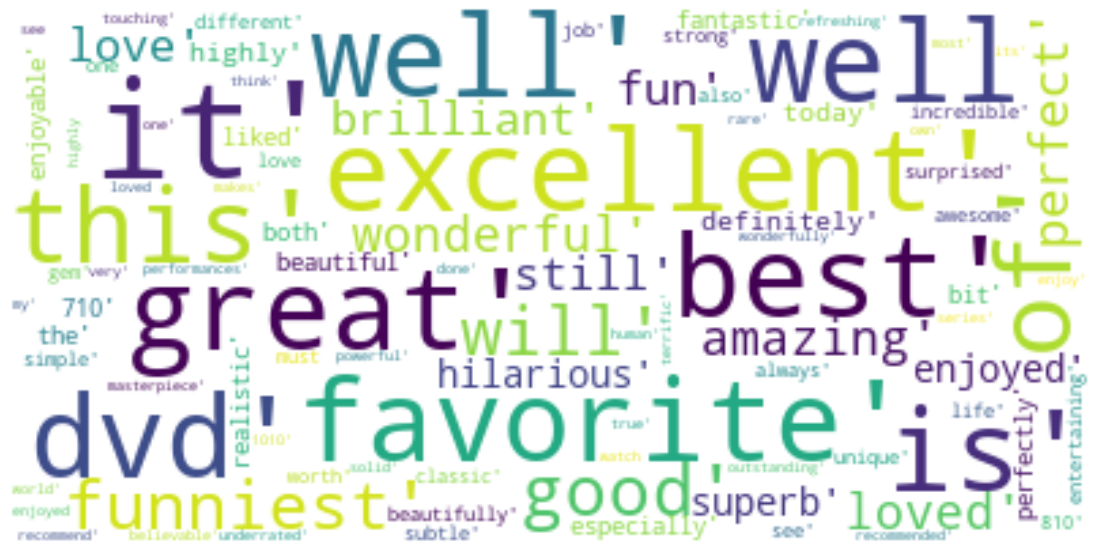

In [38]:
wordcloud=WordCloud(max_font_size=50, max_words=100, background_color="white").generate(pos_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

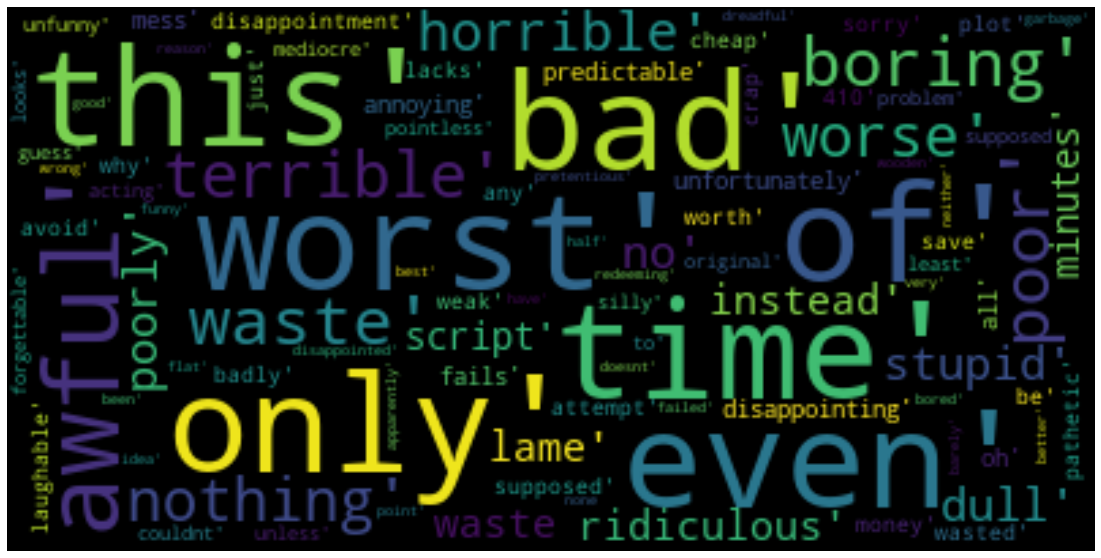

In [39]:
wordcloud=WordCloud(max_font_size=50, max_words=100).generate(neg_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()